In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:

with open('../../output/weights/p_date=2022-08-09-09_38_59/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

56001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

# Accuracy
accuracy = { k: v for k, v in enumerate(data["accuracy"]) if str(v) != "nan" }

In [4]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

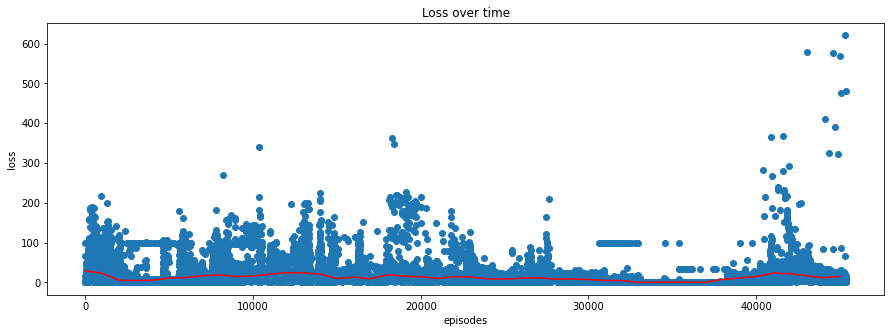

Maximum: 620.7854461669922
Average: 12.294602065722264
Moving Average: ['-20% (23.11741317607415 | -20%)', '-75% (5.6617321860429985 | -80%)', '-17% (4.647433616704407 | -83%)', '+19% (5.557814573624646 | -80%)', '+102% (11.269695000171337 | -61%)', '+8% (12.194272136139514 | -57%)', '+37% (16.81657441133362 | -41%)', '+12% (18.87532943610274 | -34%)', '-20% (14.982678687392587 | -48%)', '+8% (16.26441524264572 | -43%)', '+27% (20.80743532760572 | -28%)', '+18% (24.677280518386816 | -14%)', '-4% (23.672791240765722 | -18%)', '-11% (20.99707892626301 | -27%)', '-53% (9.819727992130494 | -66%)', '+35% (13.257773621294557 | -54%)', '-31% (9.116999393378247 | -68%)', '+112% (19.34737885080837 | -33%)', '-18% (15.734667804888776 | -45%)', '-9% (14.233210712815358 | -50%)', '-29% (10.039228868382228 | -65%)', '+44% (14.490066099861432 | -49%)', '-7% (13.339295372245891 | -53%)', '-31% (9.155966573062203 | -68%)', '-6% (8.57033707565386 | -70%)', '+25% (10.791205148992503 | -62%)', '+8% (11.7

In [5]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

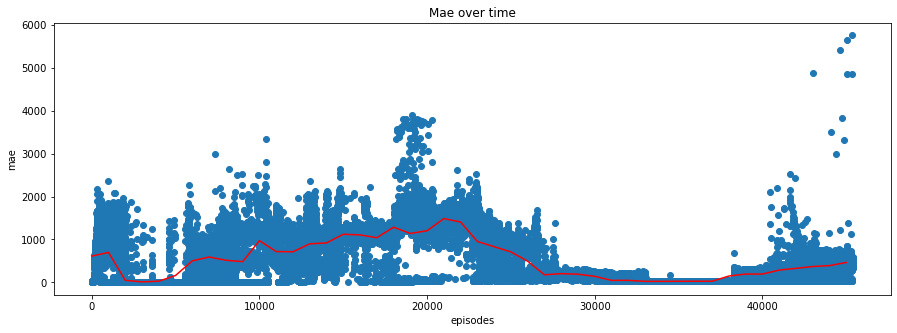

Maximum: 5750.639442443848
Average: 523.0578589216308
Moving Average: ['+13% (699.0850932210341 | 13%)', '-92% (49.97674179299119 | -91%)', '-72% (13.760541036895315 | -97%)', '+115% (29.587037929421992 | -95%)', '+451% (163.12885498403472 | -73%)', '+209% (504.1607360132191 | -17%)', '+17% (592.2961935699839 | -3%)', '-12% (517.1352856652226 | -15%)', '-6% (484.1058090442199 | -21%)', '+101% (973.1094391498577 | 58%)', '-26% (719.4931214936128 | 17%)', '0% (714.595748783185 | 16%)', '+25% (899.3640210335116 | 46%)', '+2% (920.2302797565588 | 49%)', '+21% (1121.8796411714245 | 82%)', '-1% (1107.2677659142093 | 80%)', '-5% (1041.5714605965695 | 69%)', '+23% (1286.7352548234487 | 109%)', '-11% (1140.4988978924825 | 85%)', '+5% (1203.8219564581939 | 96%)', '+23% (1487.3934371663854 | 142%)', '-5% (1406.456979635024 | 129%)', '-32% (954.2674804770734 | 55%)', '-12% (833.0831464598973 | 35%)', '-14% (711.4345195024765 | 15%)', '-30% (494.05330245439626 | -19%)', '-63% (179.34881343191933 | 

In [6]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

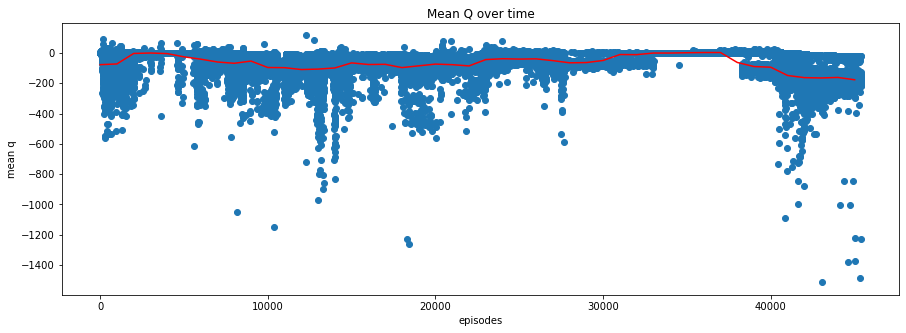

Maximum: 116.51713049411774
Average: -63.807507784792406
Moving Average: ['+75% (3.045779537108097 | -103%)', '+4% (3.1731089079430648 | -104%)', '-2069% (-62.493634535959096 | -18%)']
Minimum: -1515.4795417785645


In [7]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

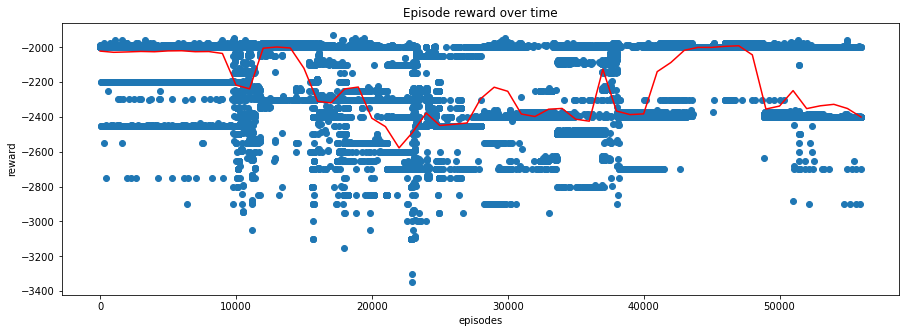

Maximum: -1931.0
Average: -2223.0047034877593
Moving Average: []
Minimum: -3350.0


In [8]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

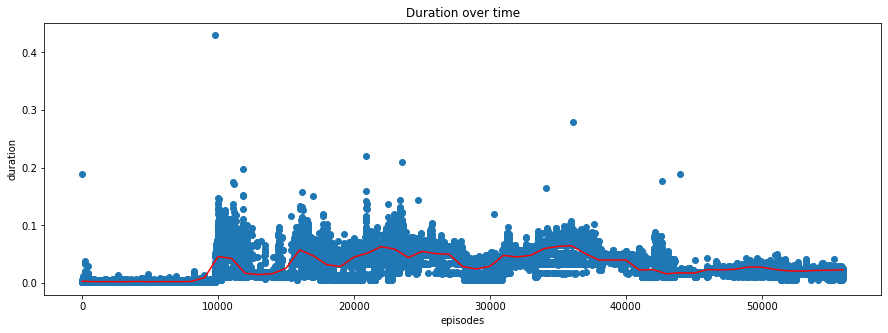

Maximum: 0.4296980000000019
Average: 0.030247445356332402
Moving Average: ['-25% (0.002346675024975037 | -25%)', '+6% (0.002487584815184839 | -20%)', '-9% (0.002255429570429521 | -28%)', '+22% (0.0027577525474526115 | -12%)', '-18% (0.002260078121878184 | -28%)', '+13% (0.0025701358641358465 | -18%)', '-7% (0.002373466733266729 | -24%)', '+13% (0.002704534565434696 | -13%)', '+246% (0.009380045754245845 | 198%)', '+390% (0.046014858241758175 | 1364%)', '-7% (0.042474405494505485 | 1251%)', '-60% (0.01688392287712279 | 437%)', '-12% (0.014695147352647502 | 367%)', '+10% (0.016224685714285647 | 416%)', '+58% (0.02577928901098931 | 720%)', '+123% (0.05752318301698266 | 1730%)', '-17% (0.04729704955044977 | 1405%)', '-32% (0.03186856873126824 | 914%)', '-10% (0.028604221178821238 | 810%)', '+57% (0.04511569570429565 | 1335%)', '+15% (0.051974140059939944 | 1553%)', '+21% (0.06320440359640404 | 1911%)', '-7% (0.05876597932067945 | 1769%)', '-24% (0.0442016359640374 | 1306%)', '+24% (0.05494

In [9]:
plot(duration, "Duration over time", "episodes", "duration")

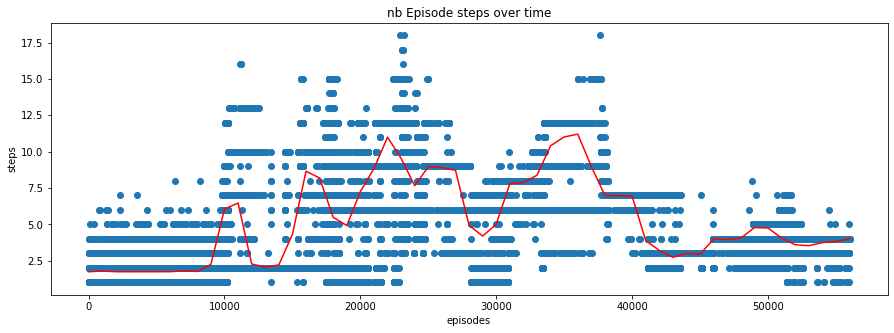

Maximum: 18
Average: 5.287727004874913
Moving Average: ['+2% (1.7822177822177823 | 2%)', '-2% (1.7392607392607393 | 0%)', '0% (1.7352647352647352 | 0%)', '+0% (1.7362637362637363 | 0%)', '0% (1.7352647352647352 | 0%)', '+0% (1.7402597402597402 | 0%)', '+2% (1.7922077922077921 | 3%)', '-1% (1.7582417582417582 | 1%)', '+27% (2.243756243756244 | 29%)', '+169% (6.050949050949051 | 248%)', '+6% (6.464535464535465 | 272%)', '-64% (2.2687312687312686 | 30%)', '-9% (2.055944055944056 | 18%)', '+7% (2.2057942057942057 | 26%)', '+95% (4.310689310689311 | 148%)', '+100% (8.651348651348652 | 397%)', '-5% (8.184815184815184 | 371%)', '-33% (5.477522477522477 | 215%)', '-10% (4.916083916083916 | 182%)', '+47% (7.254745254745255 | 317%)', '+21% (8.838161838161838 | 408%)', '+24% (10.997002997002998 | 533%)', '-13% (9.533466533466534 | 448%)', '-19% (7.656343656343656 | 340%)', '+17% (8.958041958041958 | 415%)', '0% (8.903096903096904 | 412%)', '-2% (8.716283716283716 | 401%)', '-43% (4.92507492507492

In [10]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

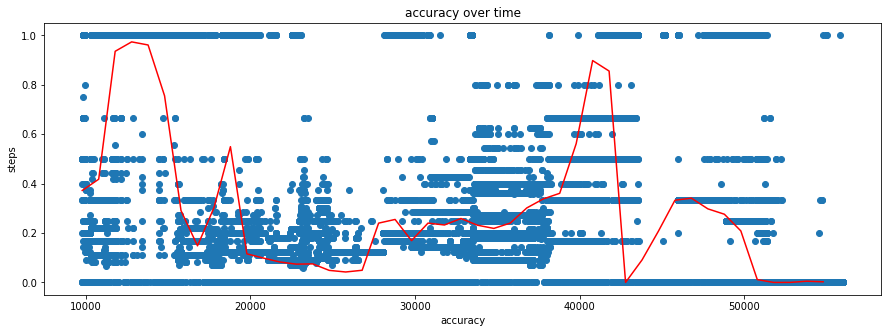

Maximum: 1.0
Average: 0.2968056825398474
Moving Average: ['+12% (0.4178555571412714 | 12%)', '+123% (0.9354811854811855 | 151%)', '+4% (0.9736117057545629 | 161%)', '-1% (0.9610457003314146 | 158%)', '-21% (0.7552365383534214 | 102%)', '-61% (0.290413554699269 | -21%)', '-48% (0.14822992802513282 | -60%)', '+103% (0.30231868808292384 | -18%)', '+81% (0.5495143024363803 | 47%)', '-78% (0.11571228194604818 | -68%)', '-14% (0.09864356422797982 | -73%)', '-15% (0.08287406980331703 | -77%)', '-10% (0.07405810735789581 | -80%)', '+1% (0.07508393205196402 | -79%)', '-34% (0.04885341930796476 | -86%)', '-13% (0.042332234864702396 | -88%)', '+16% (0.049267399267399266 | -86%)', '+387% (0.2400670757813615 | -35%)', '+6% (0.25493197278911567 | -31%)', '-33% (0.16922680494109066 | -54%)', '+41% (0.24015151515151514 | -35%)', '-3% (0.23256973906324555 | -37%)', '+11% (0.25874911524262173 | -30%)', '-10% (0.23170401027543885 | -37%)', '-5% (0.2186839134891083 | -41%)', '+9% (0.2403671004320355 | -35

In [11]:
plot(accuracy, "accuracy over time", "accuracy", "steps")